# **Project Description: Urban Traffic Incident Detection Using Real-Time Sensor Data**

**Objective**

The objective of this project is to develop a classification model to detect and predict the severity of urban traffic incidents using real-time sensor data. This model aims to help in proactive traffic management and reduce congestion by providing timely alerts for traffic incidents.

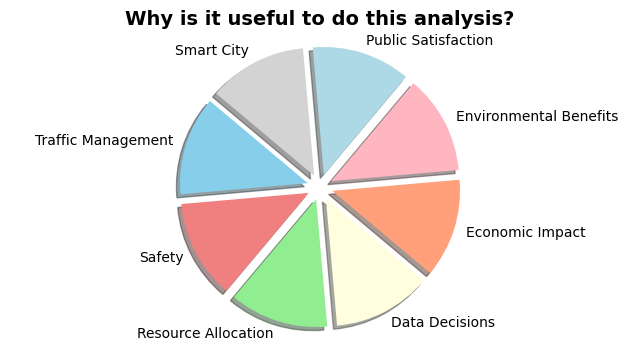

In [ ]:
import matplotlib.pyplot as plt
keywords = [
    "Traffic Management",
    "Safety",
    "Resource Allocation",
    "Data Decisions",
    "Economic Impact",
    "Environmental Benefits",
    "Public Satisfaction",
    "Smart City"
]
fig, ax = plt.subplots(figsize=(8, 4))
labels = keywords
sizes = [1] * len(keywords)
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightsalmon', 'lightpink', 'lightblue', 'lightgrey']
explode = [0.1] * len(keywords)

ax.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140)
ax.axis('equal')
plt.title('Why is it useful to do this analysis?', fontsize=14, fontweight='bold')
plt.show()


**Features**

There are  12,316 rows and 32 columns related to observations and traffic incidents, respectively.

### Dataset Column Descriptions

1. **Time**: The time of the accident.
2. **Day_of_week**: The day of the week the accident occurred.
3. **Age_band_of_driver**: Age group of the driver.
4. **Sex_of_driver**: Gender of the driver.
5. **Educational_level**: Educational level of the driver.
6. **Vehicle_driver_relation**: Relationship between the vehicle owner and the driver.
7. **Driving_experience**: Years of driving experience of the driver.
8. **Type_of_vehicle**: Type of vehicle involved in the accident.
9. **Owner_of_vehicle**: Ownership status of the vehicle.
10. **Service_year_of_vehicle**: Number of years the vehicle has been in service.
11. **Defect_of_vehicle**: Any defect present in the vehicle.
12. **Area_accident_occured**: Area where the accident occurred.
13. **Lanes_or_Medians**: Presence and type of lanes or medians on the road.
14. **Road_allignment**: Alignment of the road at the accident site.
15. **Types_of_Junction**: Type of junction where the accident occurred.
16. **Road_surface_type**: Type of road surface.
17. **Road_surface_conditions**: Condition of the road surface at the time of the accident.
18. **Light_conditions**: Light conditions at the time of the accident.
19. **Weather_conditions**: Weather conditions at the time of the accident.
20. **Type_of_collision**: Type of collision in the accident.
21. **Number_of_vehicles_involved**: Number of vehicles involved in the accident.
22. **Number_of_casualties**: Number of casualties in the accident.
23. **Vehicle_movement**: Movement of the vehicle at the time of the accident.
24. **Casualty_class**: Class of the casualty (e.g., pedestrian, passenger).
25. **Sex_of_casualty**: Gender of the casualty.
26. **Age_band_of_casualty**: Age group of the casualty.
27. **Casualty_severity**: Severity of the casualty's injuries.
28. **Work_of_casuality**: Employment status of the casualty.
29. **Fitness_of_casuality**: Fitness level of the casualty.
30. **Pedestrian_movement**: Movement of the pedestrian at the time of the accident.
31. **Cause_of_accident**: Cause of the accident.
32. **Accident_severity**: Severity of the accident.


*The project will involve data cleaning, exploratory data analysis (EDA), feature engineering, and the development of a machine learning model based on statistical analysis to classify the severity of traffic incidents based on the provided features.*

# **Import Library**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import joblib

# **Data**

In [ ]:
file_path = '/content/RTA Dataset.csv'
data = pd.read_csv(file_path)
data.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [ ]:
data_summary = pd.DataFrame({
    'Data Type': data.dtypes,
    'Missing Values': data.isnull().sum(),
    'Unique Values': data.nunique()
})
data_summary = data_summary.sort_values(by='Missing Values', ascending=False)
data_summary

Data Type  Missing Values  Unique Values
Defect_of_vehicle              object            4427              3
Service_year_of_vehicle        object            3928              6
Work_of_casuality              object            3198              7
Fitness_of_casuality           object            2635              5
Type_of_vehicle                object             950             17
Types_of_Junction              object             887              8
Driving_experience             object             829              7
Educational_level              object             741              7
Vehicle_driver_relation        object             579              4
Owner_of_vehicle               object             482              4
Lanes_or_Medians               object             385              7
Vehicle_movement               object             308             13
Area_accident_occured          object             239             14
Road_surface_type              object             172              5
Type_of_collision              object             155             10
Road_allignment                object             142              9
Casualty_class                 object               0              4
Pedestrian_movement            object               0              9
Cause_of_accident              object               0             20
Casualty_severity              object               0              4
Age_band_of_casualty           object               0              6
Sex_of_casualty                object               0              3
Time                           object               0           1074
Road_surface_conditions        object               0              4
Number_of_casualties            int64               0              8
Number_of_vehicles_involved     int64               0              6
Weather_conditions             object               0              9
Light_conditions               object               0              4
Day_of_week                    object               0              7
Sex_of_driver                  object               0              3
Age_band_of_driver             object               0              5
Accident_severity              object               0              3

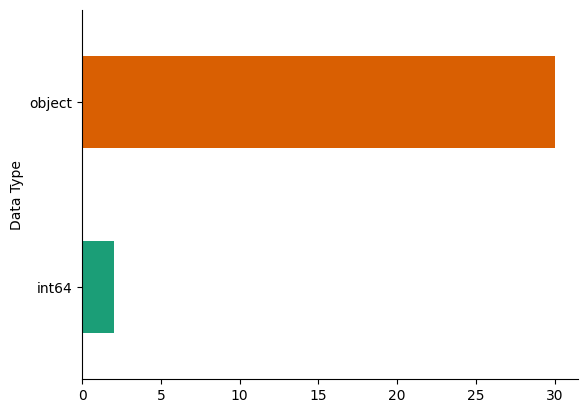

In [ ]:
data_summary.groupby('Data Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

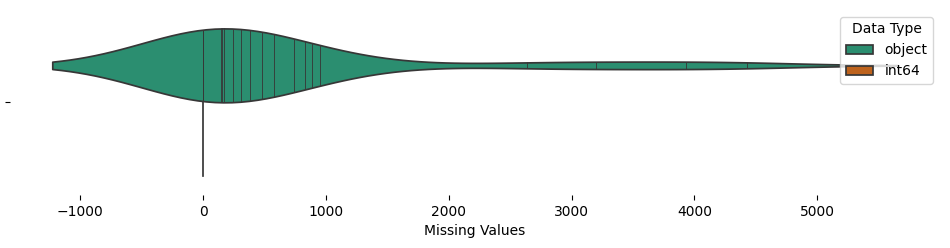

In [ ]:
figsize = (12, 1.2 * len(data_summary['Data Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data_summary, x='Missing Values', hue='Data Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: >

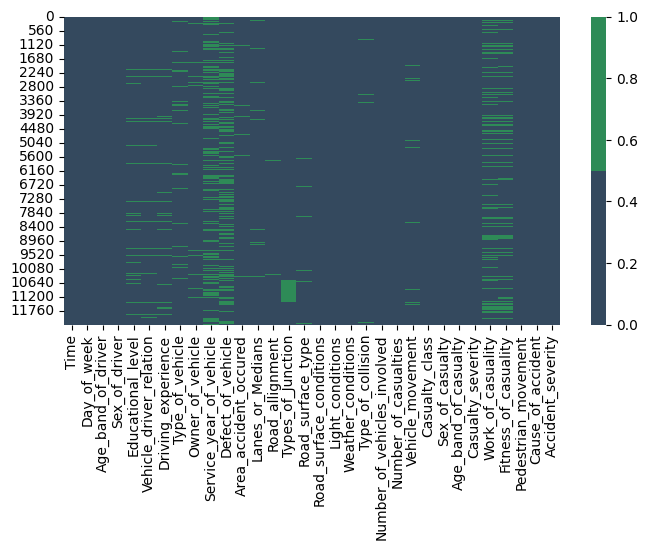

In [ ]:
plt.figure(figsize=(8,4))
colours = ['#34495E', 'seagreen']
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

In [ ]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Educational_level           741
Vehicle_driver_relation     579
Driving_experience          829
Type_of_vehicle             950
Owner_of_vehicle            482
Service_year_of_vehicle    3928
Defect_of_vehicle          4427
Area_accident_occured       239
Lanes_or_Medians            385
Road_allignment             142
Types_of_Junction           887
Road_surface_type           172
Type_of_collision           155
Vehicle_movement            308
Work_of_casuality          3198
Fitness_of_casuality       2635
dtype: int64


<code> Based on this information, there are four columns with a significant number of missing values: <code>Service_Year_of_Vehicle</code>, <code>Defect_of_Vehicle</code>, <code>Work_of_Casuality</code>, and <code>Fitness_of_Casuality</code>. The next step is to analyze their impact on the target variable, which is the severity of the accident.


<Figure size 500x500 with 0 Axes>

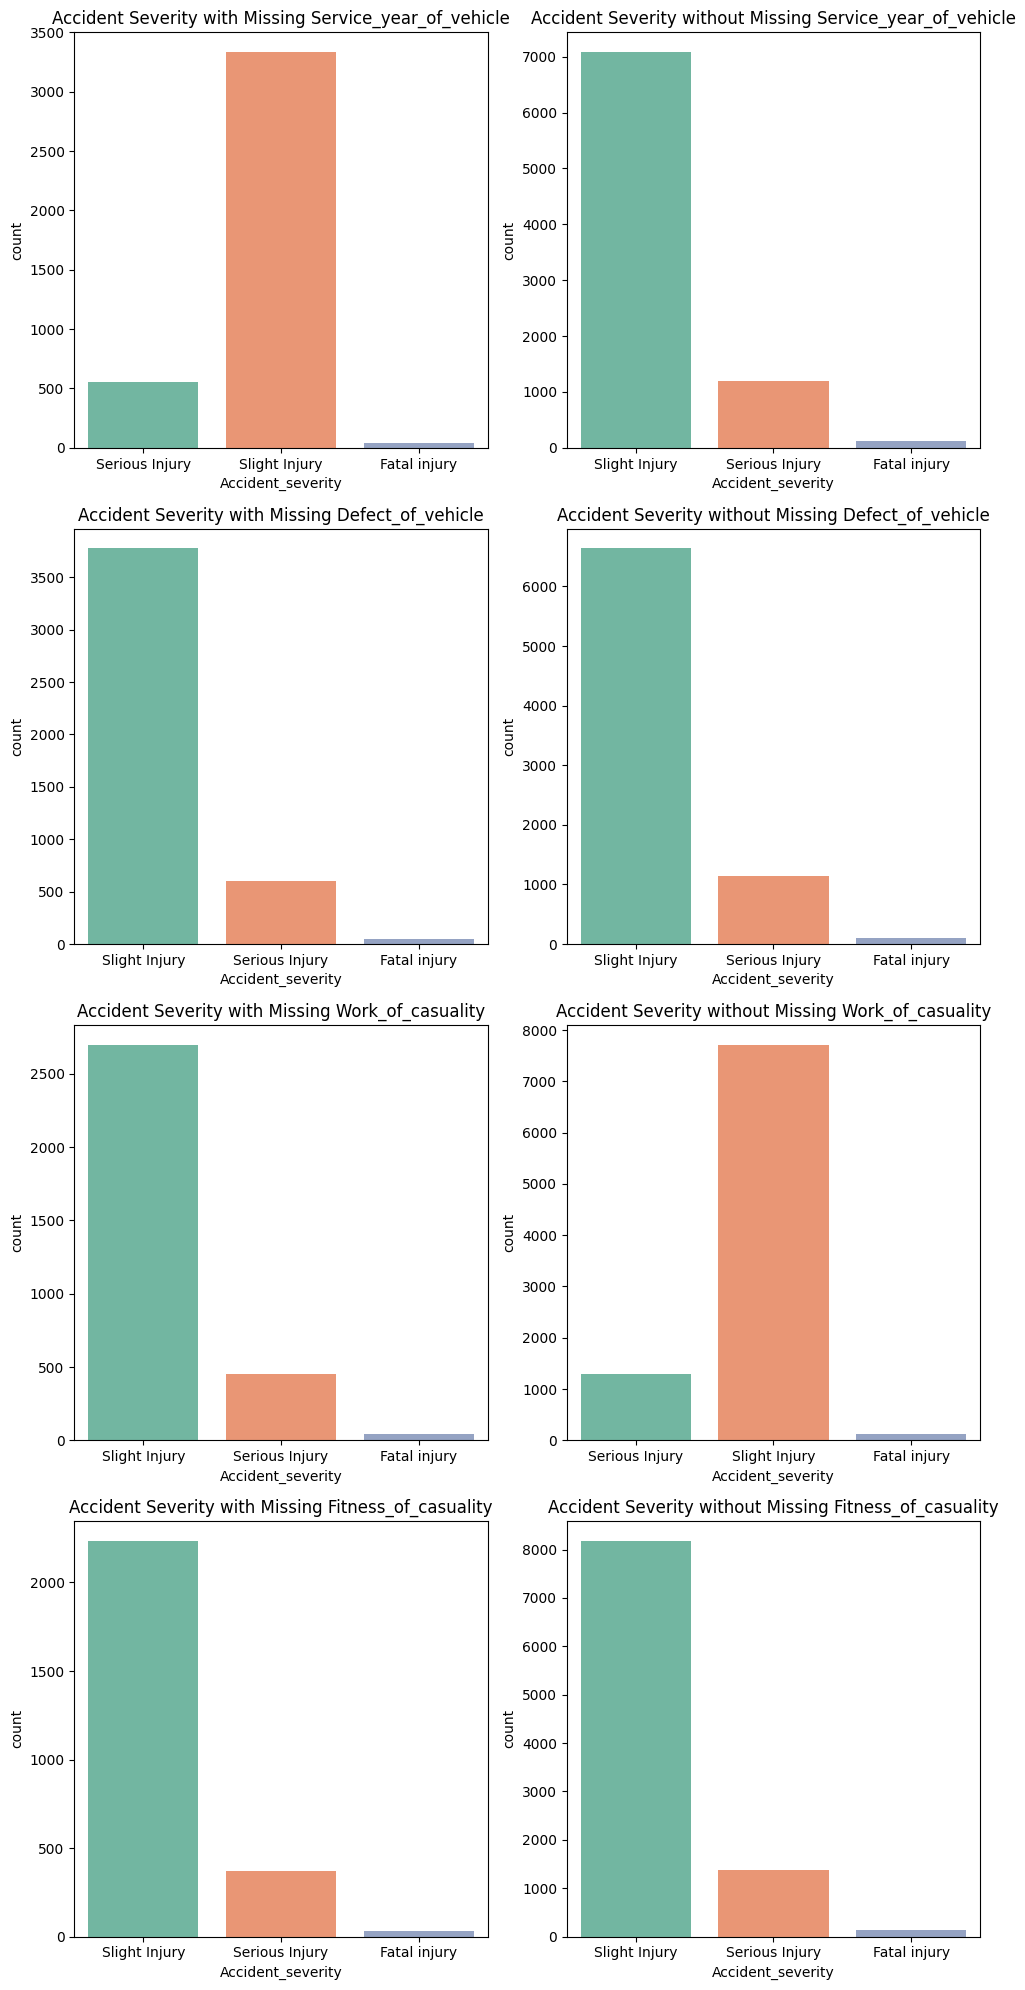

{'Service_year_of_vehicle': {'chi2': 1.722305458919597,
  'p': 0.422674571956952},
 'Defect_of_vehicle': {'chi2': 2.858304869067227, 'p': 0.23951183820217864},
 'Work_of_casuality': {'chi2': 0.075461907673656, 'p': 0.9629719899606989},
 'Fitness_of_casuality': {'chi2': 0.37391140712037346, 'p': 0.82948047860372}}

In [ ]:
from scipy.stats import chi2_contingency
columns_to_analyze = ['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality']

plt.figure(figsize=(5, 5))
unique_severities = data['Accident_severity'].unique()
palette = sns.color_palette("Set2", len(unique_severities))

# Plot the distribution of 'Accident_severity' with and without missing values
fig, axs = plt.subplots(len(columns_to_analyze), 2, figsize=(10, 5 * len(columns_to_analyze)))

for i, column in enumerate(columns_to_analyze):
    sns.countplot(x='Accident_severity', hue='Accident_severity', data=data[data[column].isnull()], ax=axs[i, 0], palette=palette)
    axs[i, 0].set_title(f'Accident Severity with Missing {column}')

    sns.countplot(x='Accident_severity', hue='Accident_severity', data=data[data[column].notnull()], ax=axs[i, 1], palette=palette)
    axs[i, 1].set_title(f'Accident Severity without Missing {column}')

plt.tight_layout()
plt.show()

# Perform chi-squared tests
chi2_results = {}
for column in columns_to_analyze:
    contingency_table = pd.crosstab(data['Accident_severity'], data[column].isnull())
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[column] = {'chi2': chi2, 'p': p}

chi2_results


<code> Chi-squared test compares the observed frequency of 'Accident_severity' levels within the groups where data is missing and where it is not missing. Since all p-values are greater than 0.05, we conclude that the missingness in these columns is not significantly associated with the levels of 'Accident_severity'. This implies that the missing values in these columns do not affect the distribution of accident severity and can be imputed without introducing bias related to the severity of accidents.

In [ ]:
# Impute with the most frequent value for 'Service_year_of_vehicle' and 'Work_of_casuality'
most_frequent_service_year = data['Service_year_of_vehicle'].mode()[0]
data['Service_year_of_vehicle'].fillna(most_frequent_service_year, inplace=True)

most_frequent_work_of_casuality = data['Work_of_casuality'].mode()[0]
data['Work_of_casuality'].fillna(most_frequent_work_of_casuality, inplace=True)

# Impute with a placeholder for 'Defect_of_vehicle' and 'Fitness_of_casuality'
data['Defect_of_vehicle'].fillna('Unknown', inplace=True)
data['Fitness_of_casuality'].fillna('Unknown', inplace=True)

In [ ]:
# Handle missing values
# Drop columns with too many missing values
#columns_to_drop = ['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality']
#data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
data.shape

(12316, 32)

In [ ]:
# Impute missing values in other columns with the mode
columns_to_impute = data.columns[data.isnull().sum() > 0]
for column in columns_to_impute:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

In [ ]:
# Verify that there are no missing values left
missing_values_cleaned = data.isnull().sum()
print(missing_values_cleaned[missing_values_cleaned > 0])

Series([], dtype: int64)


In [14]:
!pip install nbconvert
!jupyter nbconvert --to html /content/example_notebook.ipynb



[NbConvertApp] WARNING | pattern '/content/example_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]

# **Explatory Data Analysis**

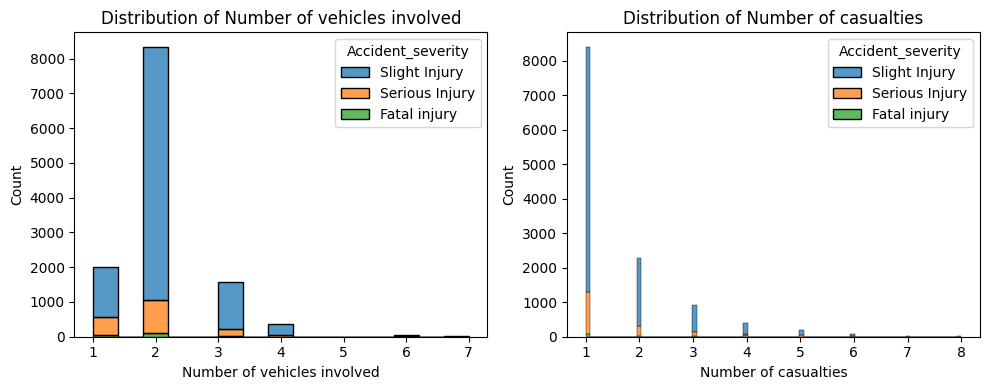

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(data=data, x='Number_of_vehicles_involved', hue='Accident_severity', multiple="stack", ax=axes[0])
axes[0].set_title('Distribution of Number of vehicles involved')
axes[0].set_xlabel('Number of vehicles involved')
axes[0].set_ylabel('Count')

sns.histplot(data=data, x='Number_of_casualties', hue='Accident_severity', multiple="stack", ax=axes[1])
axes[1].set_title('Distribution of Number of casualties')
axes[1].set_xlabel('Number of casualties')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

Summary:



*   The most frequent number of vehicles involved in traffic incidents is around 2, indicating a peak in the distribution. The majority of incidents involve between 1 and 3 vehicles, with very few incidents involving more than 3 vehicles. The distribution is right-skewed, meaning there are fewer incidents with a higher number of vehicles involved.
*   For the number of casualties, the most frequent number is 1, representing the highest peak in the distribution. Most incidents result in 1 or 2 casualties, with very few resulting in more than 2. This distribution is also right-skewed, indicating that higher casualty numbers are less common.


The histograms show that most traffic incidents involve a small number of vehicles and casualties, which can help focus modeling efforts on these common scenarios. Since the distributions are skewed, you might consider transforming these features (e.g., using log transformation) to reduce skewness and improve model performance. These insights can be used to create additional features, such as interaction terms between the number of vehicles involved and other variables to capture more complex relationships.

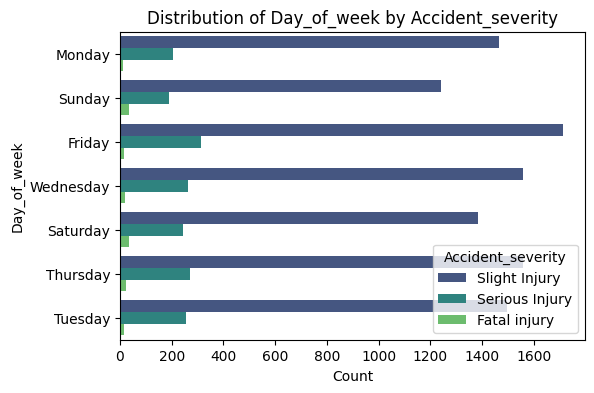

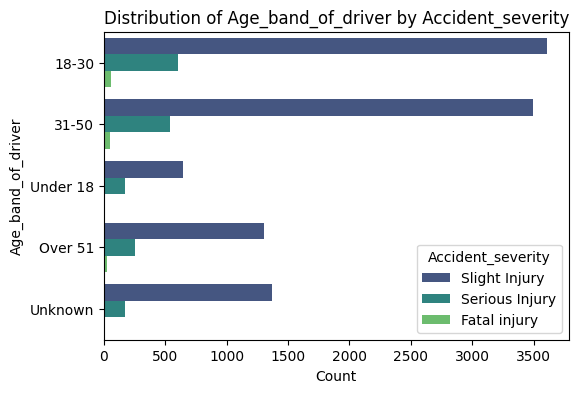

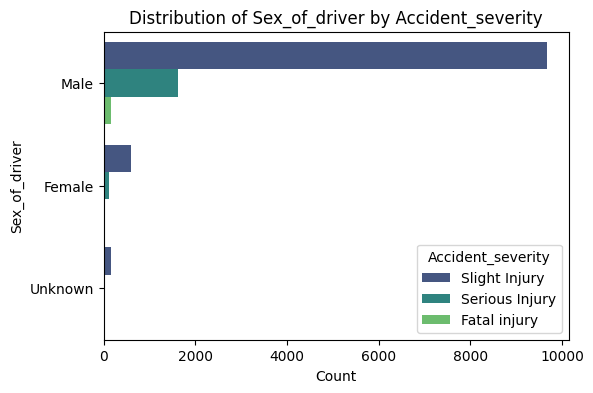

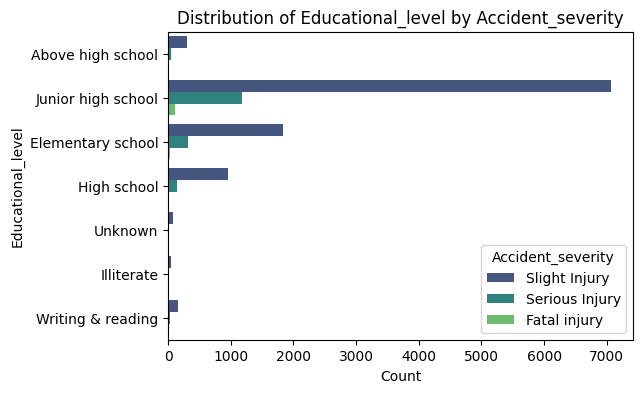

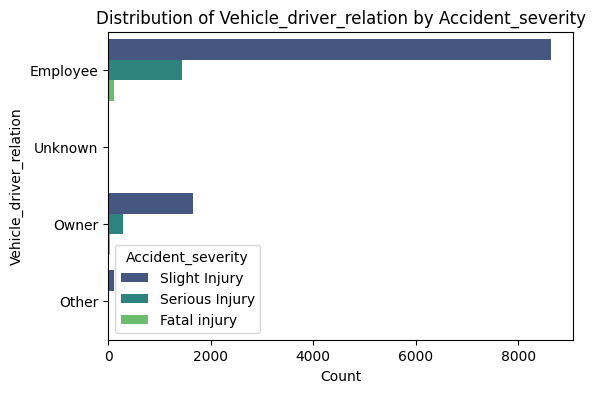

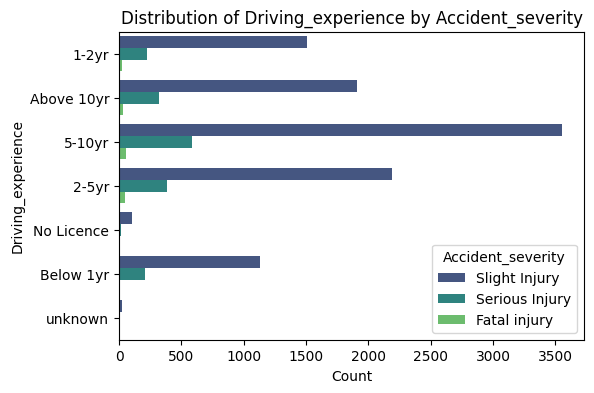

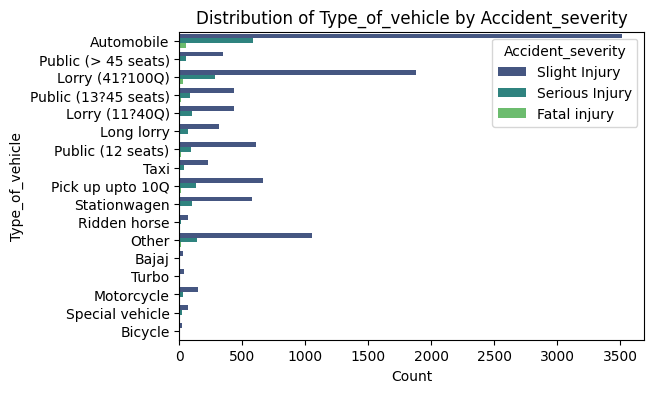

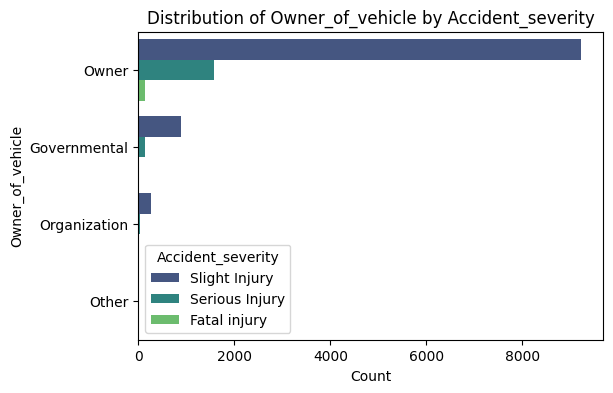

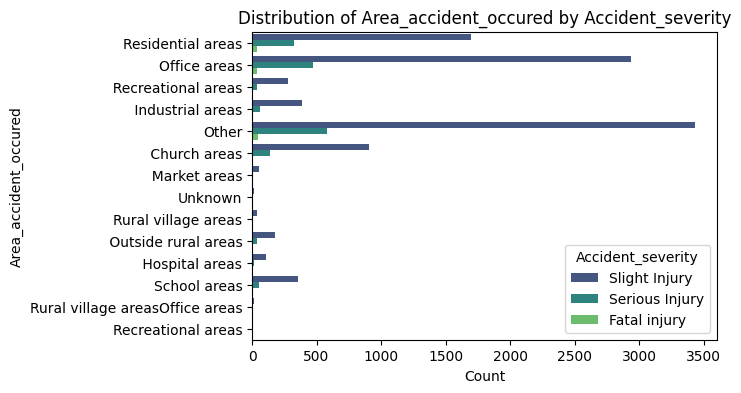

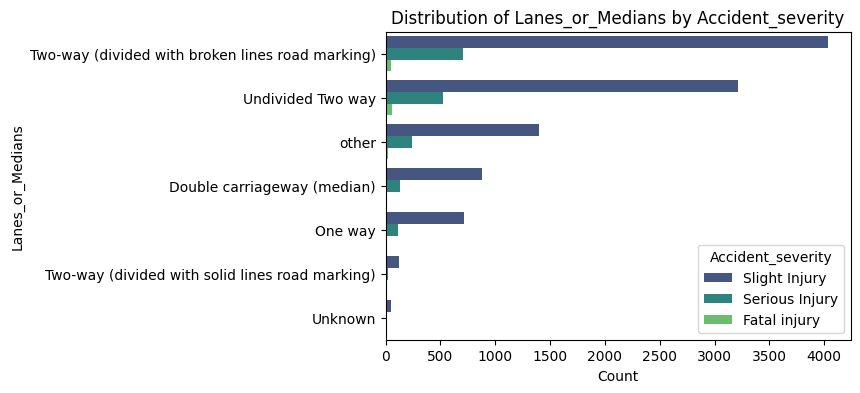

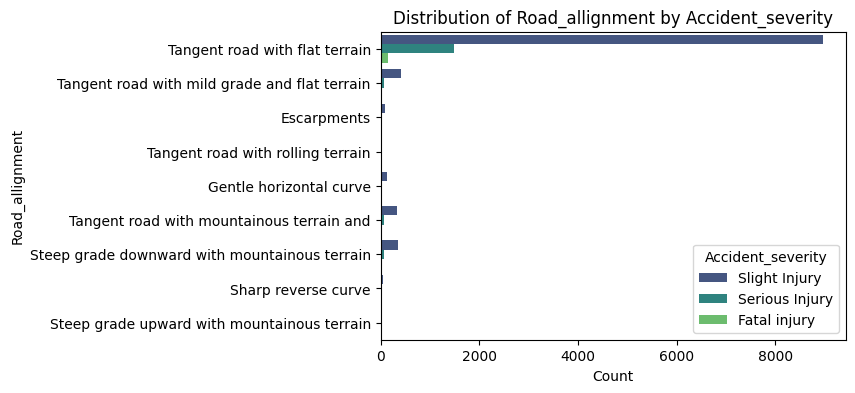

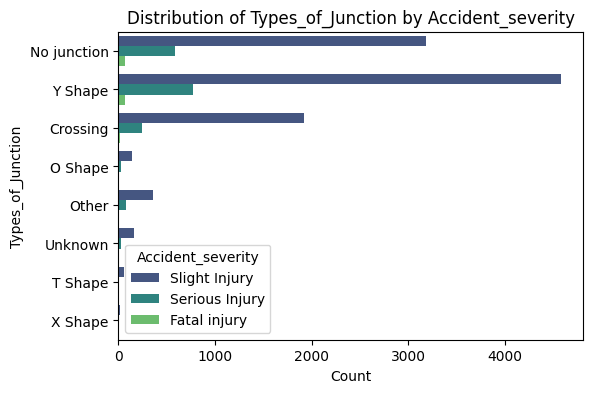

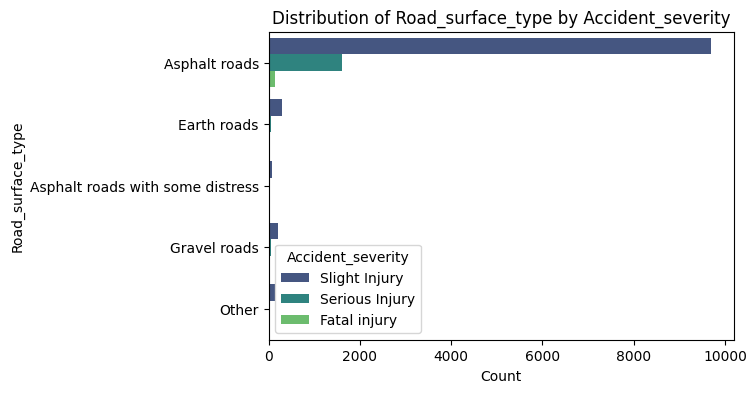

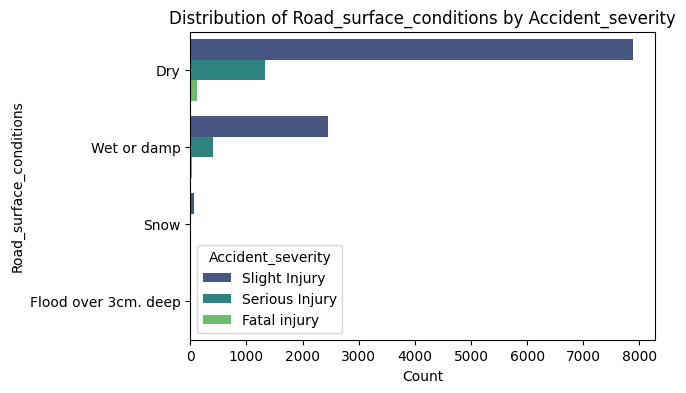

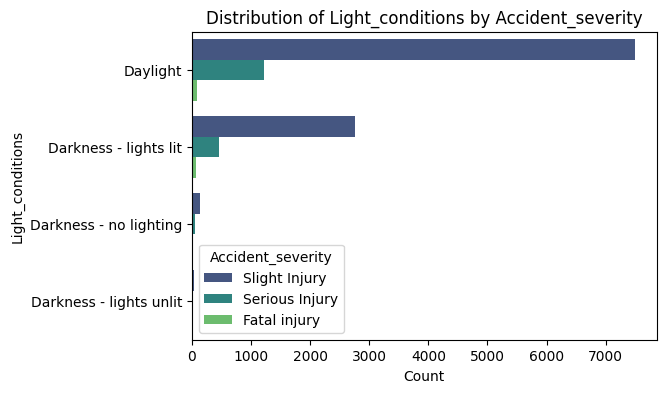

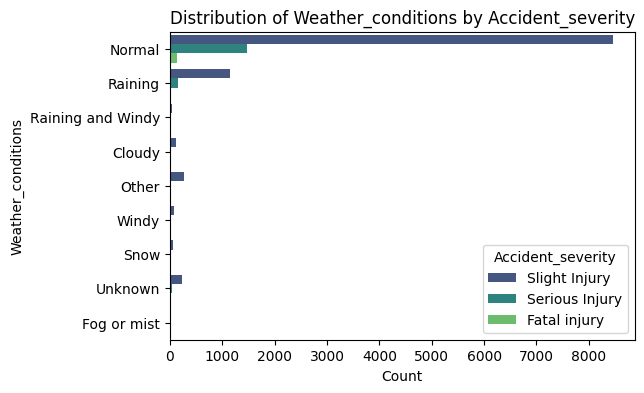

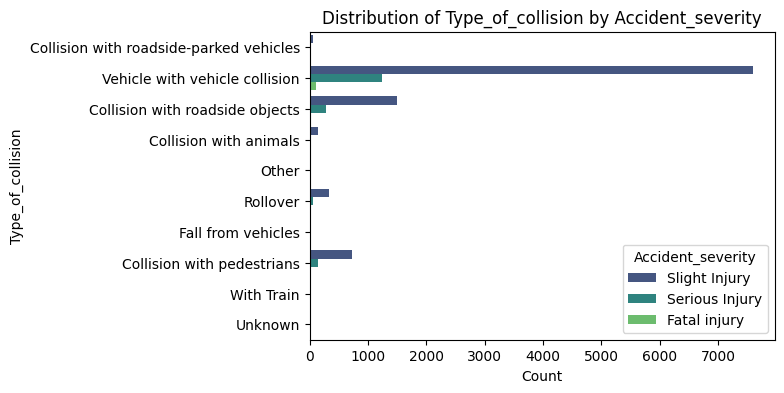

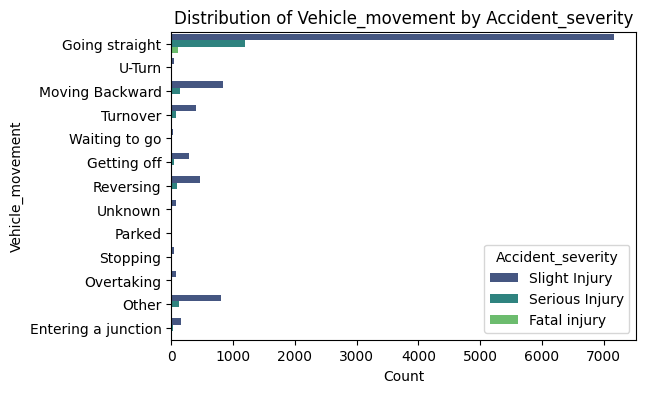

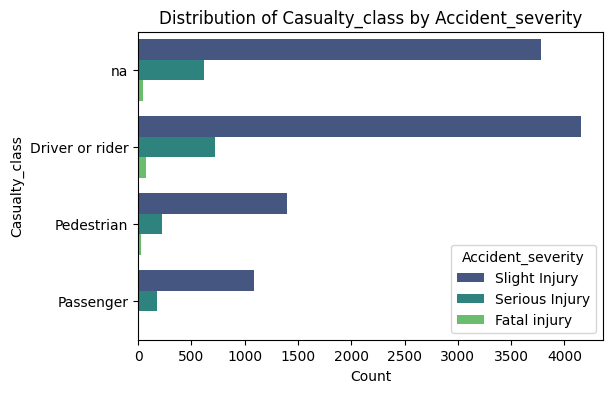

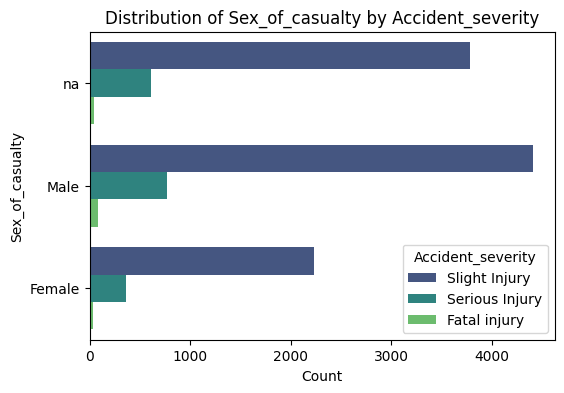

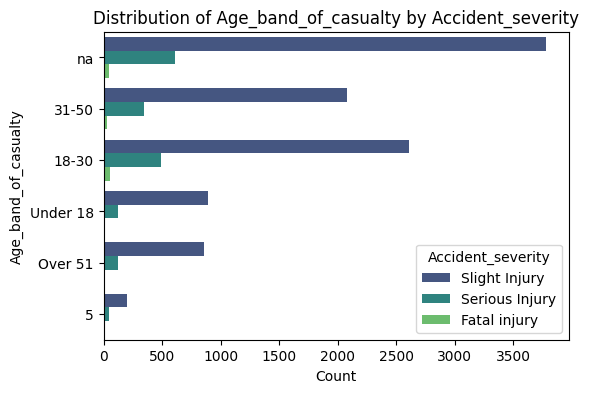

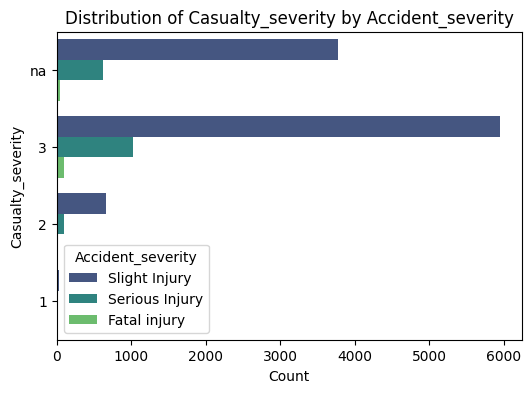

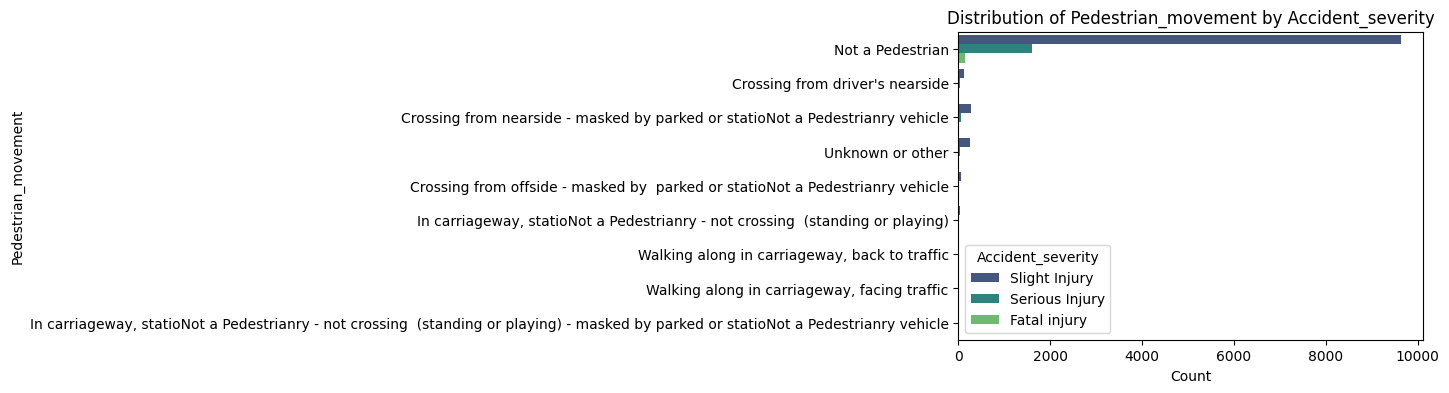

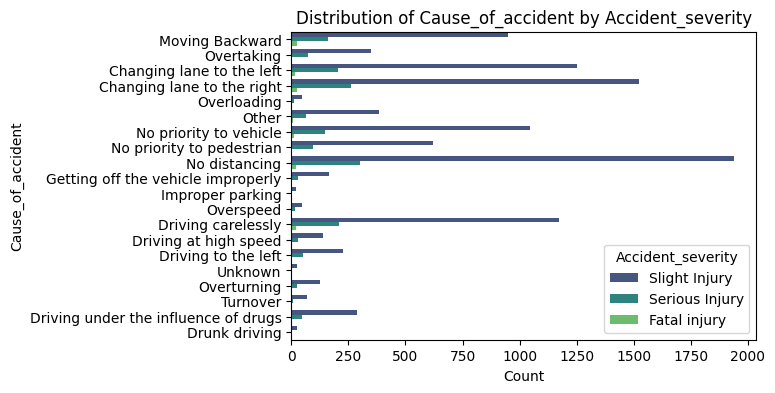

In [ ]:
hue_variable = 'Accident_severity'
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_columns = [col for col in categorical_columns if col != 'Time']
for col in categorical_columns:
    if col != hue_variable:  # Avoid using the hue variable as a category itself
        plt.figure(figsize=(6, 4))
        sns.countplot(y=data[col], hue=data[hue_variable], palette="viridis")
        plt.title(f'Distribution of {col} by {hue_variable}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.legend(title=hue_variable)
        plt.show()

Summary:

* **Day of the Week**: Accidents are relatively evenly distributed throughout the week, with a slight increase on weekends.
* **Age of Driver**: Young and middle-aged drivers (18-50) are more frequently involved in accidents.
* **Gender**: Male drivers are significantly more involved in accidents than female drivers.
* **Education Level**: Drivers with a junior high school education are most commonly involved in accidents, which may reflect socio-economic influences.

* **Vehicle Driver Relation**: Employees are more frequently involved in accidents than vehicle owners, suggesting higher exposure or job-related driving risks.
* **Driving Experience**: Drivers with 5-10 years of experience are involved in the most accidents, indicating that moderate to extensive experience does not necessarily equate to lower accident risk.
* **Type of Vehicle**: Automobiles and certain types of lorries are more frequently involved in accidents, highlighting the need to consider vehicle-specific safety measures.
* **Owner of Vehicle**: Privately owned vehicles are most commonly involved in accidents, likely reflecting their higher numbers on the road.
* **Accident Location**: Non-specific 'Other' areas, residential, and office areas are key zones for accidents, indicating a need for targeted safety measures in these areas.
* **Lane and Median Type**: Undivided two-way roads and roads with broken lines are higher risk, suggesting the need for better lane management and separation measures.
* **Road Alignment**: Straight, flat roads are not inherently safe and require driver attention and speed management measures.
* **Junction Type**: Y-shaped junctions and areas without junctions are high-risk zones, requiring better design and traffic control measures to reduce accidents.
* **Road Surface Type**: Asphalt roads see the highest number of accidents, indicating that their prevalence might be the main factor.
* **Road Surface Conditions**: Dry roads are the most common condition for accidents, but wet or damp conditions also pose significant risks.
* **Light Conditions**: Daylight conditions have the highest number of accidents, likely due to higher traffic volumes, but night driving still presents dangers.
* **Weather Conditions**: Normal weather conditions see the most accidents, with rainy conditions showing increased risk, underscoring the need for careful driving in adverse weather.
* **Type of Collision**: Collisions with parked vehicles and between moving vehicles are the most frequent, suggesting the need for better parking management and driver awareness.
* **Vehicle Movement**: Most accidents occur during straightforward driving, emphasizing the importance of vigilance even in seemingly low-risk scenarios.
* **Casualty Class**: Drivers and riders are the primary victims in accidents, indicating the need for enhanced driver protection measures. Pedestrians and passengers also require targeted safety strategies.
* **Sex of Casualty**: Male casualties are more common, suggesting a focus on male-targeted safety campaigns to address higher exposure or risk behaviors.
* **Age Band of Casualty**: Young adults (18-30) and middle-aged individuals (31-50) are the most affected by accidents, indicating a need for targeted safety measures for these age groups.
* **Casualty Severity**: Non-fatal but serious injuries (level 3) are common, highlighting the need for improved safety features in vehicles and road infrastructure to reduce injury severity.
* **Pedestrian Movement**: Pedestrian accidents often occur while crossing the road or walking along the carriageway, emphasizing the need for safer pedestrian crossings and walkways.
* **Cause of Accident**: Common causes like failure to give priority and improper lane changes point to areas where traffic enforcement and driver education can make a significant impact.

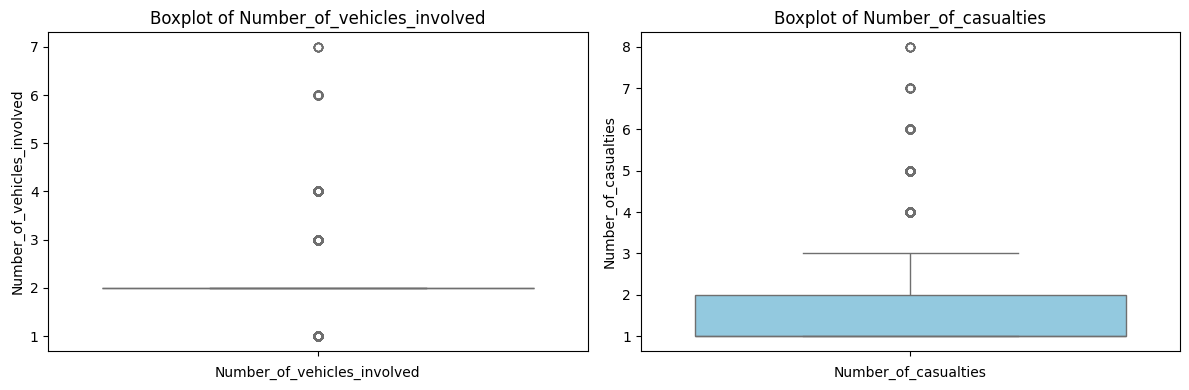

In [ ]:
# Check for Outliers
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
fig, axes = plt.subplots(len(numerical_columns)//2, 2, figsize=(12, len(numerical_columns)*2))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.show()

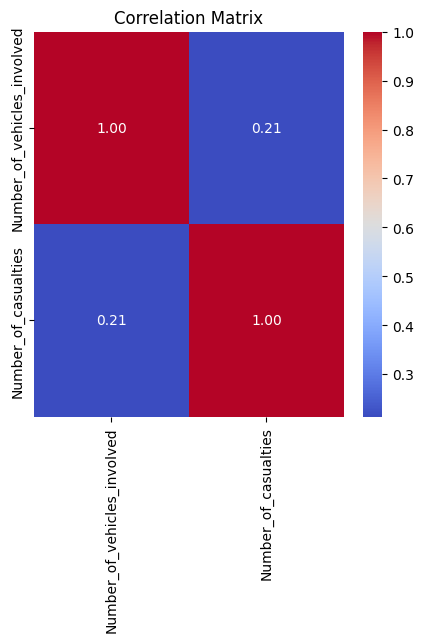

In [ ]:
# Analyze Correlations
corr = data[numerical_columns].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

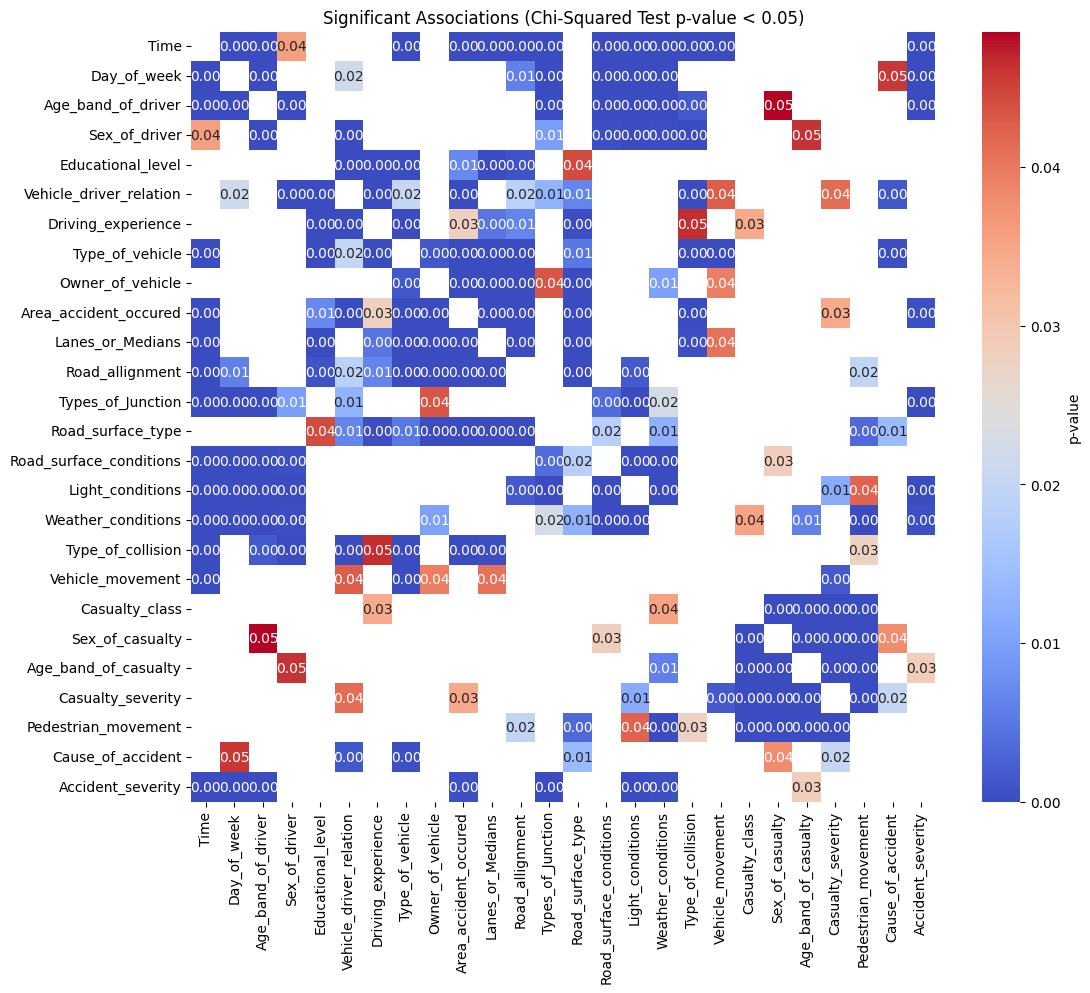

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np


# Function to calculate the p-value of the Chi-Squared test
def chi2_test(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p


# List of categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Create an empty DataFrame to store the p-values
chi2_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Calculate p-values for each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            chi2_matrix.loc[col1, col2] = np.nan  # Fill diagonal with NaN as it doesn't make sense to compare the same column
        else:
            chi2_matrix.loc[col1, col2] = chi2_test(data[col1], data[col2])

# Convert the values to float for heatmap
chi2_matrix = chi2_matrix.astype(float)

# Mask non-significant values (p-value > 0.05)
mask = chi2_matrix > 0.05

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(chi2_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, cbar_kws={'label': 'p-value'})
plt.title("Significant Associations (Chi-Squared Test p-value < 0.05)")
plt.show()

In [ ]:
!pip install ydata-profiling > /dev/null 2>&1

In [ ]:
 profile = ProfileReport(data, title="Traffic Incident Data Profile Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Drop highly correlated features based on the analysis
features_to_drop = ['Casualty_class', 'Road_surface_conditions', 'Sex_of_casualty']
data.drop(columns=features_to_drop, inplace=True)

In [ ]:
data.shape


(12316, 25)

In [ ]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Age_band_of_casualty',
       'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity'],
      dtype='object')

In [ ]:
data.drop(columns=['Casualty_severity'], inplace=True)

In [ ]:
data.shape

(12316, 24)

In [ ]:
profile = ProfileReport(data, title="Traffic Incident Data Profile Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Feature Engineering**

## *Time-based features*

In [ ]:
# Parse 'Time' column and extract the hour
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce')
data['hour'] = data['Time'].dt.hour
data['hour'] = data['hour'].fillna(-1)


In [ ]:
data.head()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0 1900-01-01 17:02:00      Monday              18-30          Male   
1 1900-01-01 17:02:00      Monday              31-50          Male   
2 1900-01-01 17:02:00      Monday              18-30          Male   
3 1900-01-01 01:06:00      Sunday              18-30          Male   
4 1900-01-01 01:06:00      Sunday              18-30          Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle Owner_of_vehicle Area_accident_occured  ...  \
0           Automobile            Owner     Residential areas  ...   
1  Public (> 45 seats)            Owner          Office areas  ...   
2      Lorry (41?100Q)            Owner    Recreational areas  ...   
3  Public (> 45 seats)     Governmental          Office areas  ...   
4           Automobile            Owner      Industrial areas  ...   

  Weather_conditions                        Type_of_collision  \
0             Normal  Collision with roadside-parked vehicles   
1             Normal           Vehicle with vehicle collision   
2             Normal          Collision with roadside objects   
3             Normal           Vehicle with vehicle collision   
4             Normal           Vehicle with vehicle collision   

  Number_of_vehicles_involved Number_of_casualties Vehicle_movement  \
0                           2                    2   Going straight   
1                           2                    2   Going straight   
2                           2                    2   Going straight   
3                           2                    2   Going straight   
4                           2                    2   Going straight   

  Age_band_of_casualty Pedestrian_movement           Cause_of_accident  \
0                   na    Not a Pedestrian             Moving Backward   
1                   na    Not a Pedestrian                  Overtaking   
2                31-50    Not a Pedestrian   Changing lane to the left   
3                18-30    Not a Pedestrian  Changing lane to the right   
4                   na    Not a Pedestrian                  Overtaking   

   Accident_severity hour  
0      Slight Injury   17  
1      Slight Injury   17  
2     Serious Injury   17  
3      Slight Injury    1  
4      Slight Injury    1  

[5 rows x 25 columns]

In [ ]:
print(data[['Time', 'hour']].head())

                 Time  hour
0 1900-01-01 17:02:00    17
1 1900-01-01 17:02:00    17
2 1900-01-01 17:02:00    17
3 1900-01-01 01:06:00     1
4 1900-01-01 01:06:00     1


## *Encoding categorical variables*

In [ ]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Age_band_of_casualty',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity',
       'hour'],
      dtype='object')

In [ ]:
# One-hot encode categorical variables
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Define target and features
severity_columns = [col for col in data_encoded.columns if 'Accident_severity_' in col]
X = data_encoded.drop(severity_columns + ['Time'], axis=1)  # Ensure 'Time' is not in the features
y = data_encoded[severity_columns]

# Convert target variable to single categorical column
y = y.idxmax(axis=1).apply(lambda x: x.replace('Accident_severity_', ''))


In [ ]:
data_encoded.shape

(12316, 154)

In [ ]:
data_encoded.columns

Index(['Time', 'Number_of_vehicles_involved', 'Number_of_casualties', 'hour',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
       ...
       'Cause_of_accident_No priority to vehicle', 'Cause_of_accident_Other',
       'Cause_of_accident_Overloading', 'Cause_of_accident_Overspeed',
       'Cause_of_accident_Overtaking', 'Cause_of_accident_Overturning',
       'Cause_of_accident_Turnover', 'Cause_of_accident_Unknown',
       'Accident_severity_Serious Injury', 'Accident_severity_Slight Injury'],
      dtype='object', length=154)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert target labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)

# Feature selection using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled_encoded)

selector = SelectFromModel(rf, threshold="mean", prefit=True)
X_selected = selector.transform(X_resampled)

# Check the shape of the selected features
print(X_selected.shape)


(20830, 58)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
X_selected

array([[ 2,  2, 17, ...,  0,  0,  0],
       [ 2,  2, 17, ...,  0,  0,  0],
       [ 2,  2, 17, ...,  0,  0,  0],
       ...,
       [ 1,  1, 14, ...,  0,  0,  0],
       [ 2,  1,  7, ...,  0,  0,  0],
       [ 1,  1, 17, ...,  0,  0,  0]])

In [ ]:
selected_features = X.columns[selector.get_support()]
print("Selected features:")
print(selected_features)

Selected features:
Index(['Number_of_vehicles_involved', 'Number_of_casualties', 'hour',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
       'Age_band_of_driver_31-50', 'Age_band_of_driver_Over 51',
       'Age_band_of_driver_Unknown', 'Sex_of_driver_Male',
       'Educational_level_Elementary school', 'Educational_level_High school',
       'Educational_level_Junior high school', 'Vehicle_driver_relation_Owner',
       'Driving_experience_2-5yr', 'Driving_experience_5-10yr',
       'Driving_experience_Above 10yr', 'Driving_experience_Below 1yr',
       'Type_of_vehicle_Lorry (41?100Q)', 'Type_of_vehicle_Other',
       'Type_of_vehicle_Pick up upto 10Q', 'Type_of_vehicle_Public (12 seats)',
       'Type_of_vehicle_Stationwagen', 'Owner_of_vehicle_Owner',
       'Area_accident_occured_ Church areas',
       'Area_accident_occured_Office areas', 'Area_accident_occured_Other',
    

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [ ]:
y_resampled_encoded

array([1, 1, 0, ..., 0, 0, 0])

# **Model selection**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled_encoded, test_size=0.2, random_state=42)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


# *Decision Tree*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
dt_pred = dt_model.predict(X_test)
print("Decision Tree Classifier")
print(classification_report(y_test, dt_pred))
print(f'Accuracy: {accuracy_score(y_test, dt_pred)}')

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      2119
           1       0.83      0.76      0.79      2047

    accuracy                           0.81      4166
   macro avg       0.81      0.81      0.81      4166
weighted avg       0.81      0.81      0.81      4166

Accuracy: 0.8060489678348536


# *Logsitic regression*

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict and evaluate
lr_pred = lr_model.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, lr_pred))
print(f'Accuracy: {accuracy_score(y_test, lr_pred)}')


Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      2119
           1       0.82      0.88      0.85      2047

    accuracy                           0.85      4166
   macro avg       0.85      0.85      0.85      4166
weighted avg       0.85      0.85      0.85      4166

Accuracy: 0.8468554968795007


# *Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best score for Random Forest: {grid_search_rf.best_score_}")

# Predict and evaluate
rf_best_model = grid_search_rf.best_estimator_
rf_pred = rf_best_model.predict(X_test)
print("Random Forest Classifier after Hyperparameter Tuning")
print(classification_report(y_test, rf_pred))
print(f'Accuracy: {accuracy_score(y_test, rf_pred)}')

Fitting 5 folds for each of 150 candidates, totalling 750 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'log2', 'n_estimators': 500}
Best score for Random Forest: 0.8589774343580817
Random Forest Classifier after Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2119
           1       0.83      0.86      0.85      2047

    accuracy                           0.85      4166
   macro avg       0.85      0.85      0.85      4166
weighted avg       0.85      0.85      0.85      4166

Accuracy: 0.8456553048487758


In [ ]:
joblib.dump(rf_best_model, 'random_forest_model.pkl')


In [ ]:
y_train

array([0, 1, 1, ..., 1, 1, 0])

# *Neural Network*

In [ ]:
!pip install keras-tuner > /dev/null 2>&1


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoding
y_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_input', min_value=32, max_value=512, step=32),
        input_dim=X_train.shape[1],
        activation='relu'))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
            activation='relu'))
    model.add(Dense(y_onehot.shape[1], activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

tuner.search(X_train, y_onehot, epochs=50, validation_split=0.2)

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Evaluate the best model
y_pred_proba = best_model.predict(X_test)
y_pred = y_pred_proba.argmax(axis=1)

print("Neural Network after Hyperparameter Tuning")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Trial 5 Complete [00h 06m 16s]
val_accuracy: 0.8782878120740255

Best val_accuracy So Far: 0.88258824745814
Total elapsed time: 00h 33m 24s
131/131 [==============================] - 0s 3ms/step
Neural Network after Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2119
           1       0.81      0.93      0.87      2047

    accuracy                           0.86      4166
   macro avg       0.87      0.86      0.86      4166
weighted avg       0.87      0.86      0.86      4166

Accuracy: 0.8600576092174748


In [ ]:
joblib.dump(best_model, 'NN_model.pkl')

# *Light GBM*

In [ ]:
import lightgbm as lgb

# Train LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict and evaluate
lgb_pred = lgb_model.predict(X_test)
print("LightGBM Classifier")
print(classification_report(y_test, lgb_pred))
print(f'Accuracy: {accuracy_score(y_test, lgb_pred)}')

[LightGBM] [Info] Number of positive: 8368, number of negative: 8296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 16664, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502160 -> initscore=0.008641
[LightGBM] [Info] Start training from score 0.008641
LightGBM Classifier
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2119
           1       0.85      0.91      0.88      2047

    accuracy                           0.87      4166
   macro avg       0.88      0.87      0.87      4166
weighted avg       0.88      0.87      0.87      4166

Accuracy: 0.8739798367738838


In [ ]:
joblib.dump(lgb_model, 'LightGBM_model.pkl')


# *XGBoost*

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [4, 6, 8, 10, 12, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


# Initialize the model
xgb_model = xgb.XGBClassifier(random_state=42)

# Perform Grid Search
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best score for XGBoost: {grid_search_xgb.best_score_}")

# Predict and evaluate
xgb_best_model = grid_search_xgb.best_estimator_
xgb_pred = xgb_best_model.predict(X_test)
print("XGBoost Classifier after Hyperparameter Tuning")
print(classification_report(y_test, xgb_pred))
print(f'Accuracy: {accuracy_score(y_test, xgb_pred)}')

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 300, 'subsample': 0.9}
Best score for XGBoost: 0.8997839819996406
XGBoost Classifier after Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      2119
           1       0.87      0.94      0.90      2047

    accuracy                           0.90      4166
   macro avg       0.90      0.90      0.90      4166
weighted avg       0.90      0.90      0.90      4166

Accuracy: 0.9023043686989919


In [ ]:
joblib.dump(xgb_best_model, 'XGBoost.pkl')


**Overall, XGBoost overperforms among other models.**

# **Removing outliers in numerical columns to see if accuracy is increased**

In [ ]:
from scipy import stats

correct_column_names = X_train.shape[1]  # Use the column names corresponding to 58 columns

# Columns to check for outliers
columns_to_check = ['Number_of_vehicles_involved', 'Number_of_casualties']
# Convert X_train and X_test back to DataFrames using the correct column names
X_train_df = pd.DataFrame(X_train, columns=data_encoded.columns[:correct_column_names])
X_test_df = pd.DataFrame(X_test, columns=data_encoded.columns[:correct_column_names])


# Calculate Z-scores for the specified columns
z_scores_train = np.abs(stats.zscore(X_train_df[columns_to_check]))
z_scores_test = np.abs(stats.zscore(X_test_df[columns_to_check]))

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers in the training data
outliers_train = (z_scores_train > threshold).any(axis=1)
print(f"Number of outliers in X_train: {outliers_train.sum()}")

# Identify outliers in the test data
outliers_test = (z_scores_test > threshold).any(axis=1)
print(f"Number of outliers in X_test: {outliers_test.sum()}")



Number of outliers in X_train: 454
Number of outliers in X_test: 139


In [ ]:
# Remove outliers from training data
X_train_clean = X_train_df[~outliers_train]
y_train_clean = y_train[~outliers_train]

# Remove outliers from test data
X_test_clean = X_test_df[~outliers_test]
y_test_clean = y_test[~outliers_test]

print(f"Shape of X_train before removing outliers: {X_train.shape}")
print(f"Shape of X_train after removing outliers: {X_train_clean.shape}")
print(f"Shape of X_test before removing outliers: {X_test.shape}")
print(f"Shape of X_test after removing outliers: {X_test_clean.shape}")

Shape of X_train before removing outliers: (16664, 58)
Shape of X_train after removing outliers: (16210, 58)
Shape of X_test before removing outliers: (4166, 58)
Shape of X_test after removing outliers: (4027, 58)


In [ ]:
# Random Forest
rf_best_model.fit(X_train_clean, y_train_clean)
rf_pred2 = rf_best_model.predict(X_test_clean)
print("Random Forest after Removing Outliers")
print(classification_report(y_test_clean, rf_pred2))
print(f'Accuracy: {accuracy_score(y_test_clean, rf_pred2)}')

Random Forest after Removing Outliers
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2041
           1       0.83      0.87      0.85      1986

    accuracy                           0.85      4027
   macro avg       0.85      0.85      0.85      4027
weighted avg       0.85      0.85      0.85      4027

Accuracy: 0.8457909113483983


In [ ]:
# XGBoost
xgb_best_model.fit(X_train_clean, y_train_clean)
xgb_pred2 = xgb_best_model.predict(X_test_clean)
print("XGBoost after Removing Outliers")
print(classification_report(y_test_clean, xgb_pred2))
print(f'Accuracy: {accuracy_score(y_test_clean, xgb_pred2)}')

XGBoost after Removing Outliers
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2041
           1       0.87      0.93      0.90      1986

    accuracy                           0.90      4027
   macro avg       0.90      0.90      0.90      4027
weighted avg       0.90      0.90      0.90      4027

Accuracy: 0.8971939408989322


**No improvement**

# **Plots for Receiver Operating Characteristic (ROC)**

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

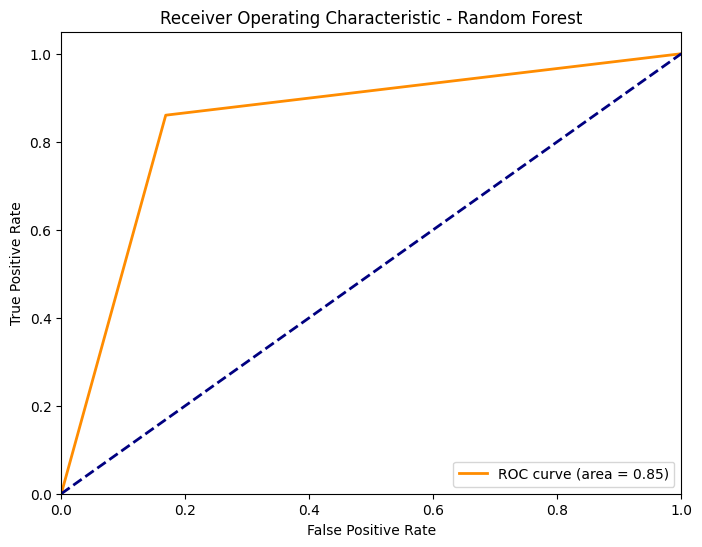

In [ ]:

# Random Forest ROC Curve
plot_roc_curve(y_test, rf_pred, 'Random Forest')



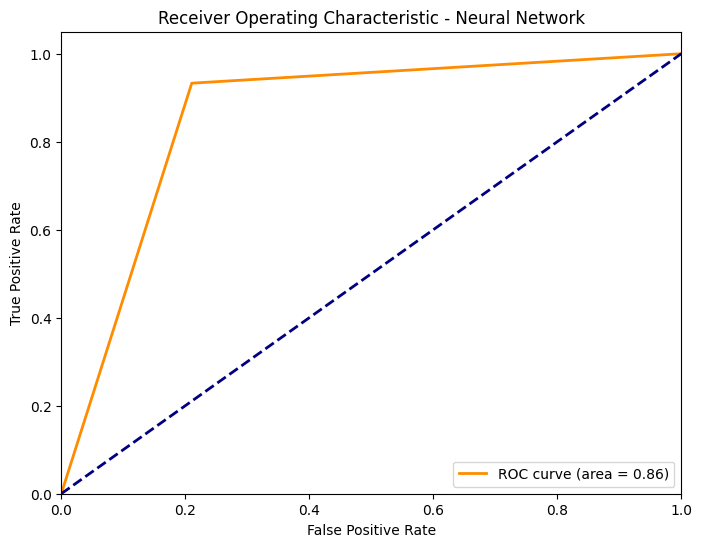

In [ ]:
# Neural Network ROC Curve
plot_roc_curve(y_test,y_pred, 'Neural Network')


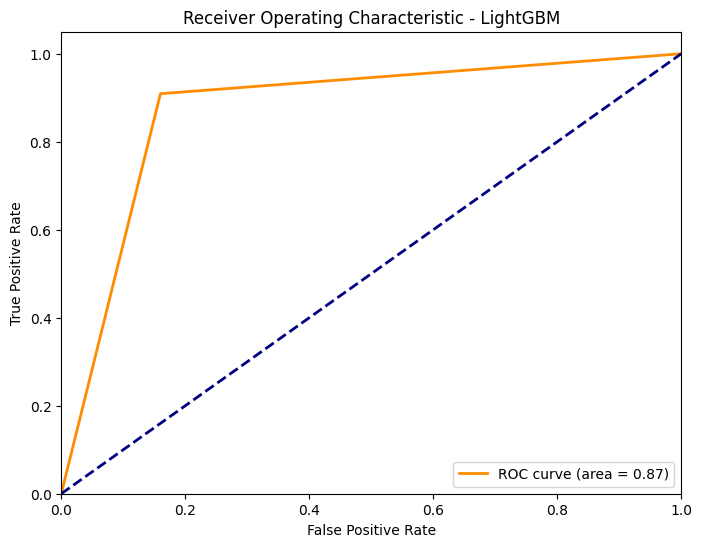

In [ ]:
plot_roc_curve(y_test, lgb_pred, 'LightGBM')

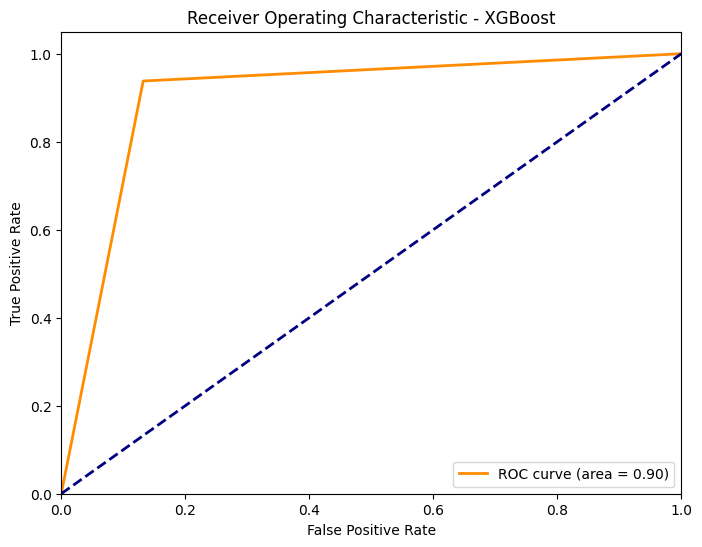

In [ ]:
# XGBoost ROC Curve
plot_roc_curve(y_test, xgb_pred, 'XGBoost')

In [ ]:
!pip install shap > /dev/null 2>&1

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


shap_values: <class 'numpy.ndarray'> - length: 4166
SHAP values shape: (4166, 58)
X_test shape: (4166, 58)


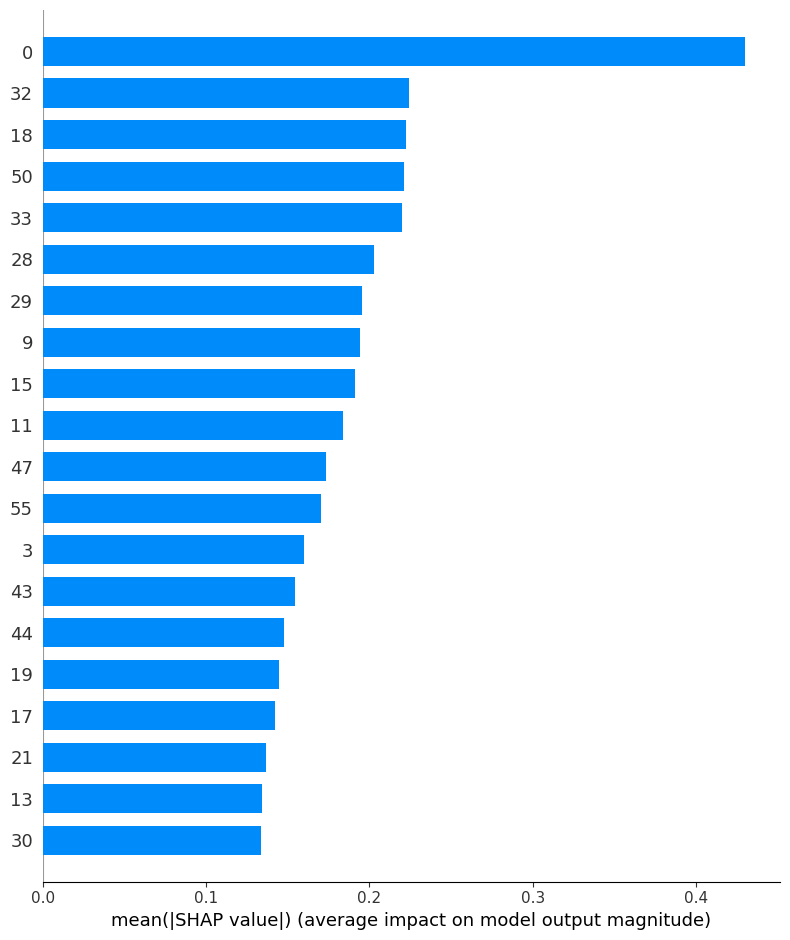

In [ ]:
import shap
# Ensure X_test is a DataFrame and has the correct column names
X_scaled_df = pd.DataFrame(X_scaled)  # Ensure this is the correct DataFrame
X_test = pd.DataFrame(X_test, columns=X_scaled_df.columns)

# Create a SHAP explainer for the LightGBM model
explainer_LGB = shap.TreeExplainer(lgb_model)
shap_values_LGB = explainer_LGB.shap_values(X_test, check_additivity=False)

# Check the structure of shap_values
print(f"shap_values: {type(shap_values_LGB)} - length: {len(shap_values_LGB)}")
print(f"SHAP values shape: {shap_values_LGB.shape}")
print(f"X_test shape: {X_test.shape}")

# Handle SHAP values based on the output structure
if isinstance(shap_values_LGB, list):
    # For binary classification, LightGBM returns a list with two arrays
    if len(shap_values_LGB) > 1:
        shap_values_positive_class = shap_values_LGB[1]  # Select the array for the positive class
    else:
        shap_values_positive_class = shap_values_LGB[0]  # In case it's a single array for the positive class
else:
    shap_values_positive_class = shap_values_LGB

# Ensure the SHAP values are a 2D array
if shap_values_positive_class.ndim == 1:
    shap_values_positive_class = shap_values_positive_class.reshape(-1, 1)

# Plot SHAP summary plot
shap.summary_plot(shap_values_positive_class, X_test, plot_type="bar", feature_names=X_test.columns)

In [ ]:
import joblib
joblib.dump(rf_best_model, 'random_forest_model.pkl')
joblib.dump(best_model, 'nn_model.pkl')
joblib.dump(xgb_best_model, 'XGBoosting_model.pkl')
joblib.dump(lgb_model, 'LightGBM_model.pkl')




['LightGBM_model.pkl']

In [ ]:

explainer_xgb = shap.TreeExplainer(xgb_best_model)
shap_values_xgb = explainer_xgb.shap_values(X_test, check_additivity=False)
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar", feature_names=X_test.columns)

In [ ]:
# Use SHAP's DeepExplainer for the neural network
explainer_nn = shap.DeepExplainer(model, X_train)
shap_values_nn = explainer_nn.shap_values(X_test)

# Since this is a multi-class problem, shap_values will be a list with one array per class
# Let's take the SHAP values for the first class as an example
shap_values_class_0 = shap_values_nn[0]

# Plot SHAP summary plot for the first class
shap.summary_plot(shap_values_class_0, X_test, plot_type="bar")